# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the clean dataset

In [2]:
df = pd.read_csv(r"C:\Users\WELCOME\OneDrive\Desktop\Food Delivery Data Analysis\data\clean\cleaned_data.csv")

# Sanity test

In [3]:
df.head()

,order_id,customer_id,category,item,price,quantity,order_total,order_date,payment_method,order_hour,order_day,order_month
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card,0,Thursday,12
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet,0,Friday,5
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,0,Wednesday,9
3,ORD_630508,CUST_075,Drinks,Unknown,5.0,2.0,5.0,2022-08-09,Credit Card,0,Tuesday,8
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash,0,Sunday,5


In [4]:
df.tail()

,order_id,customer_id,category,item,price,quantity,order_total,order_date,payment_method,order_hour,order_day,order_month
17529,ORD_320102,CUST_021,Drinks,Unknown,5.0,4.0,4.0,2023-12-23,Cash,0,Saturday,12
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash,0,Monday,12
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet,0,Friday,5
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet,0,Thursday,1
17533,ORD_680707,CUST_006,Desserts,Unknown,7.0,4.0,28.0,2023-01-07,Unknown,0,Saturday,1


# Summary of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        17534 non-null  object 
 1   customer_id     17534 non-null  object 
 2   category        17534 non-null  object 
 3   item            17534 non-null  object 
 4   price           17534 non-null  float64
 5   quantity        17534 non-null  float64
 6   order_total     17534 non-null  float64
 7   order_date      17534 non-null  object 
 8   payment_method  17534 non-null  object 
 9   order_hour      17534 non-null  int64  
 10  order_day       17534 non-null  object 
 11  order_month     17534 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.6+ MB


In [6]:
df.describe()

,price,quantity,order_total,order_hour,order_month
count,17534.000000,17534.000000,17534.000000,17534.0,17534.000000
mean,6.507072,3.014149,19.793972,0.0,6.527033
std,4.724985,1.397143,18.517022,0.0,3.438642
min,1.000000,1.000000,1.000000,0.0,1.000000
25%,4.000000,2.000000,8.000000,0.0,4.000000
50%,5.000000,3.000000,15.000000,0.0,7.000000
75%,7.000000,4.000000,24.000000,0.0,10.000000
max,20.000000,5.000000,100.000000,0.0,12.000000


# Univariate Analysis

## 1. Category

In [7]:
df['category'].describe()

count           17534
unique              5
top       Main Dishes
freq             3551
Name: category, dtype: object

<Axes: xlabel='category', ylabel='Count'>

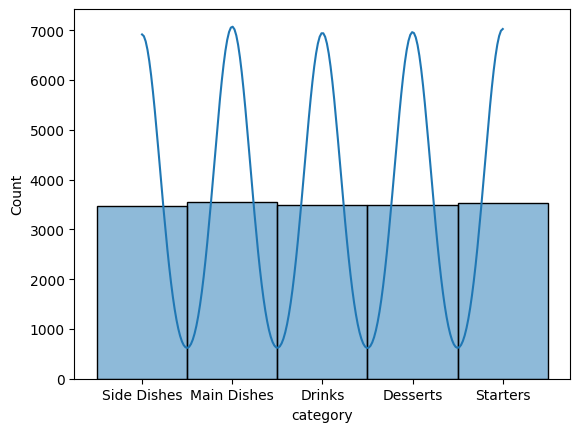

In [8]:
sns.histplot(df['category'], kde=True)

## 2. Item

In [9]:
df['item'].describe()

count       17534
unique         27
top       Unknown
freq         1758
Name: item, dtype: object

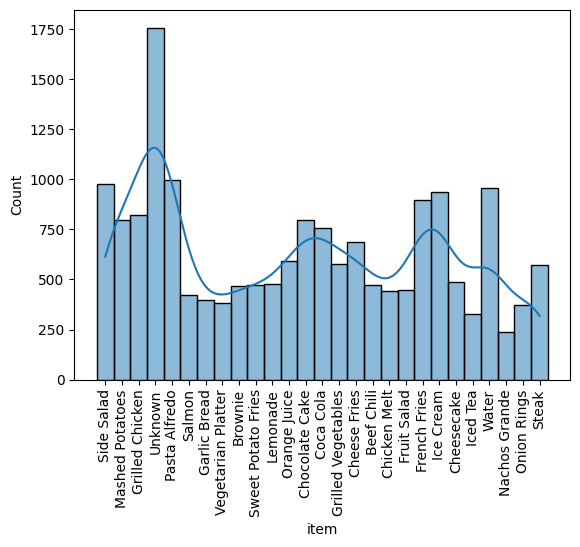

In [10]:
sns.histplot(df['item'], kde=True)
plt.xticks(rotation=90)
plt.show()

## 2.1 Top 10 items

<Axes: ylabel='item'>

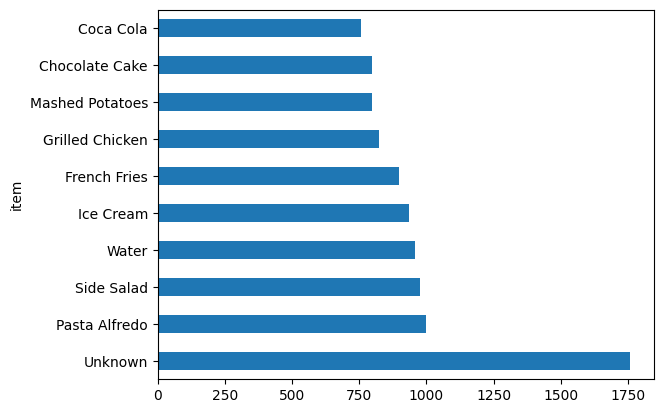

In [11]:
top_items = df['item'].value_counts().head(10)
top_items.plot(kind='barh')

## 3. Price

In [12]:
df['price'].describe()

count    17534.000000
mean         6.507072
std          4.724985
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

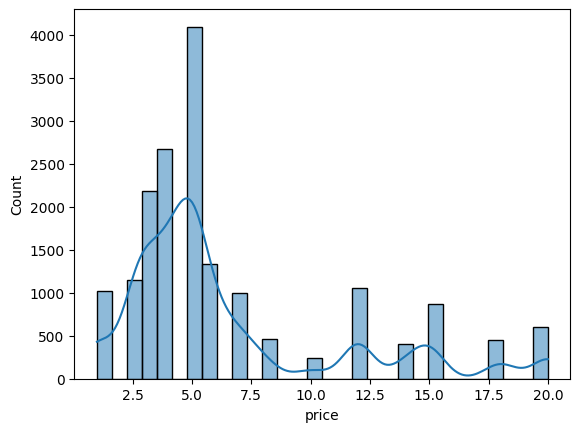

In [13]:
sns.histplot(df['price'], kde=True, bins=30)

## 4. Quantity

In [14]:
df['quantity'].describe()

count    17534.000000
mean         3.014149
std          1.397143
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: quantity, dtype: float64

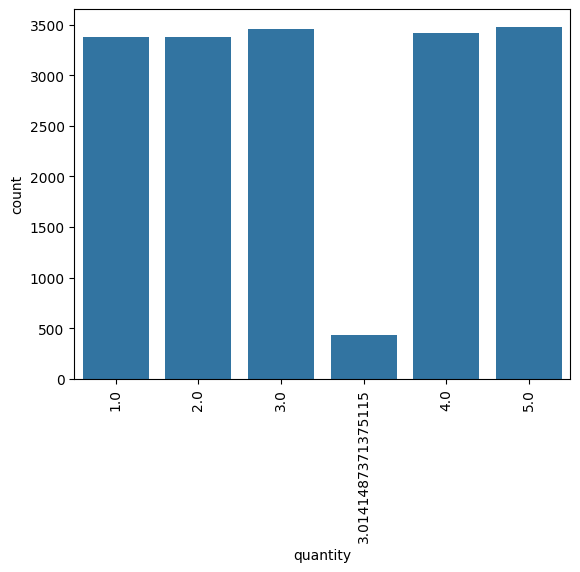

In [15]:
sns.countplot(data=df, x='quantity')
plt.xticks(rotation= 90)
plt.show()

I think we made a mistake while cleaning we need to fix this

In [16]:
df = df[df['quantity'] != 3.0141487371375115]

In [17]:
mode_value = df['quantity'].mode()[0]
df['quantity'] = df['quantity'].fillna(mode_value)

In [18]:
df['quantity'].describe()

count    17104.000000
mean         3.014149
std          1.414598
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: quantity, dtype: float64

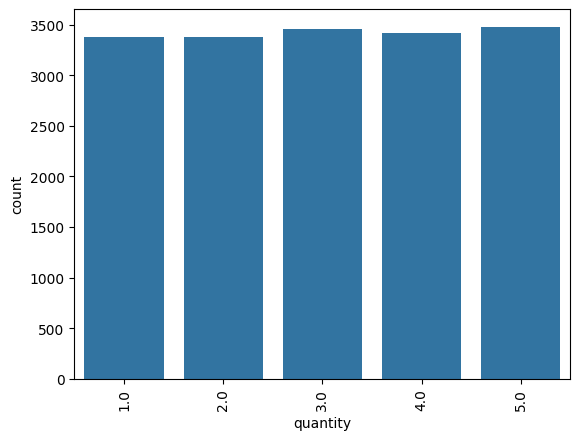

In [19]:
sns.countplot(data=df, x='quantity')
plt.xticks(rotation=90)
plt.show()

## 5. Order Total

In [20]:
df['order_total'].describe()

count    17104.000000
mean        19.914494
std         18.732549
min          1.000000
25%          7.500000
50%         15.000000
75%         25.000000
max        100.000000
Name: order_total, dtype: float64

In [115]:
df['order_total'].mean().round(2)

np.float64(19.91)

<Axes: xlabel='order_total', ylabel='Count'>

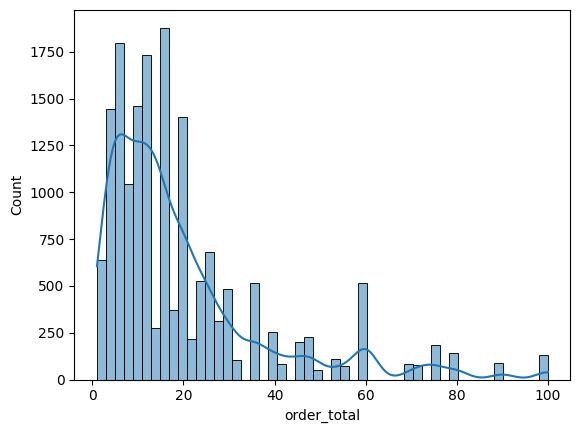

In [22]:
sns.histplot(data=df, x='order_total', kde=True, bins=50)

## 6. Order_Date

In [26]:
df['order_date'].describe()

count          17104
unique           730
top       2023-11-25
freq              41
Name: order_date, dtype: object

## 7. Payment Method

In [23]:
df['payment_method'].describe()

count     17104
unique        4
top        Cash
freq       5412
Name: payment_method, dtype: object

<Axes: xlabel='payment_method', ylabel='count'>

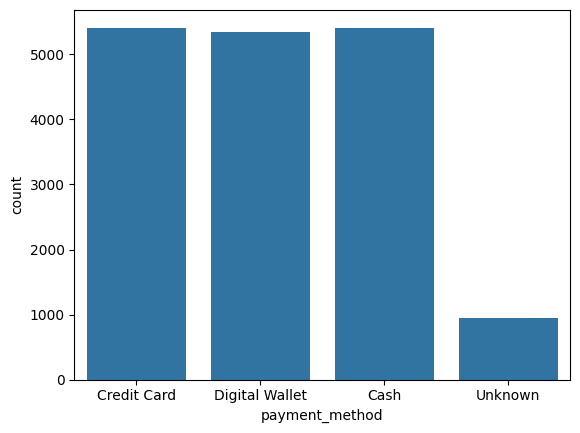

In [25]:
sns.countplot(data=df, x='payment_method')

## 8. Order Hour

In [34]:
df['order_hour'].describe()

count    17104.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: order_hour, dtype: float64

## 9. Order Day

In [35]:
df['order_day'].describe()

count      17104
unique         7
top       Friday
freq        2473
Name: order_day, dtype: object

<Axes: xlabel='order_day', ylabel='count'>

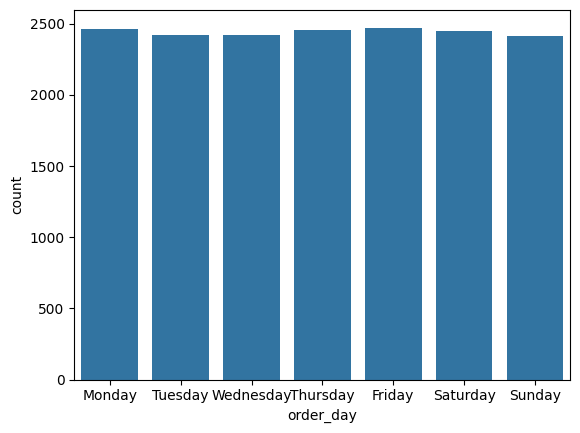

In [71]:
sns.countplot(
    x='order_day',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

## 10. Order Month

In [36]:
df['order_month'].describe()

count    17104.000000
mean         6.521749
std          3.439268
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: order_month, dtype: float64

<Axes: xlabel='order_month', ylabel='count'>

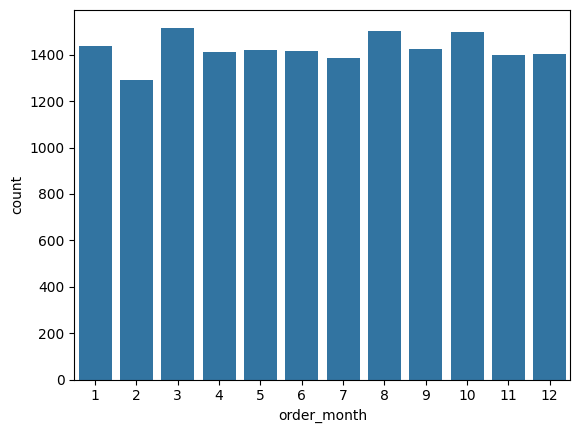

In [72]:
sns.countplot(x='order_month', data=df)

# Bivariate Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17104 entries, 0 to 17533
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        17104 non-null  object 
 1   customer_id     17104 non-null  object 
 2   category        17104 non-null  object 
 3   item            17104 non-null  object 
 4   price           17104 non-null  float64
 5   quantity        17104 non-null  float64
 6   order_total     17104 non-null  float64
 7   order_date      17104 non-null  object 
 8   payment_method  17104 non-null  object 
 9   order_hour      17104 non-null  int64  
 10  order_day       17104 non-null  object 
 11  order_month     17104 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


## 1. quantity vs order_total (num vs num)

<Axes: xlabel='quantity', ylabel='order_total'>

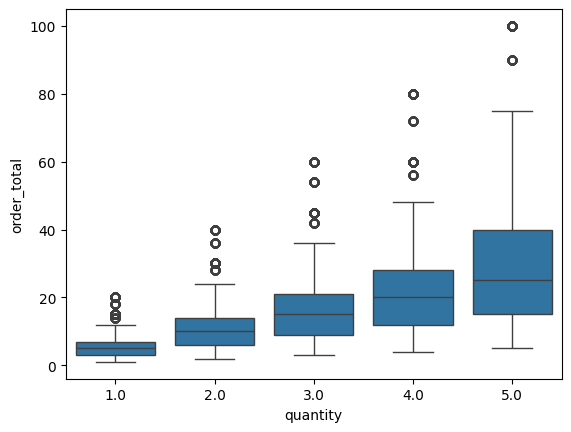

In [47]:
sns.boxplot(x='quantity', y='order_total', data=df)

## 2. category vs order_total (cat vs num)

In [48]:
df.groupby('category')['order_total'].sum().sort_values(ascending=False)

category
Main Dishes    160553.0
Starters        60044.0
Desserts        56883.0
Side Dishes     40549.0
Drinks          22588.5
Name: order_total, dtype: float64

## 3. Top revenue generating items | item vs order_total (cat vs num)

In [57]:
top_items = (df.groupby('item')['order_total'].sum().sort_values(ascending=False).head(5))
print(top_items)

item
Grilled Chicken    37380.0
Pasta Alfredo      37128.0
Steak              35320.0
Unknown            25936.0
Salmon             22608.0
Name: order_total, dtype: float64


<Axes: xlabel='item'>

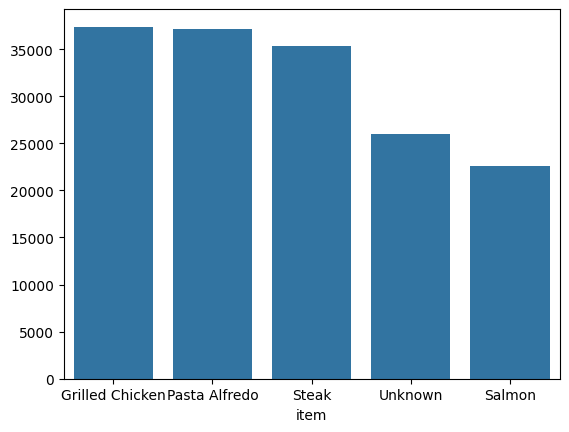

In [63]:
sns.barplot(x=top_items.index, y=top_items.values)

## 4. Top customers | customer_id vs order_total (identifer vs num)

In [67]:
customer_revenue = (
    df.groupby('customer_id')['order_total']
      .sum()
      .sort_values(ascending=False).head(5)
)
print(customer_revenue)

customer_id
CUST_089    4112.0
CUST_020    4064.5
CUST_028    4056.0
CUST_017    4041.5
CUST_066    4032.5
Name: order_total, dtype: float64


<Axes: xlabel='customer_id'>

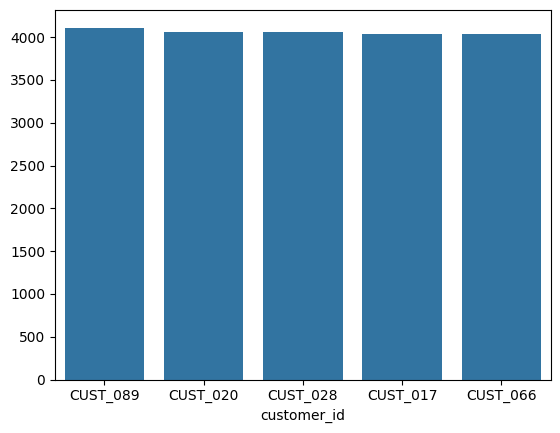

In [69]:
sns.barplot(y=customer_revenue.values, x=customer_revenue.index)

# Time based Analysis

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17104 entries, 0 to 17533
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        17104 non-null  object 
 1   customer_id     17104 non-null  object 
 2   category        17104 non-null  object 
 3   item            17104 non-null  object 
 4   price           17104 non-null  float64
 5   quantity        17104 non-null  float64
 6   order_total     17104 non-null  float64
 7   order_date      17104 non-null  object 
 8   payment_method  17104 non-null  object 
 9   order_hour      17104 non-null  int64  
 10  order_day       17104 non-null  object 
 11  order_month     17104 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 2.2+ MB


## 1. order_day vs order_total

In [107]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
top_revenue_by_day = (df.groupby('order_day')['order_total'].sum().reindex(days_order))
print(top_revenue_by_day)

order_day
Monday       49298.5
Tuesday      49723.0
Wednesday    47013.5
Thursday     47992.5
Friday       48664.5
Saturday     48328.5
Sunday       49597.0
Name: order_total, dtype: float64


<Axes: xlabel='order_day'>

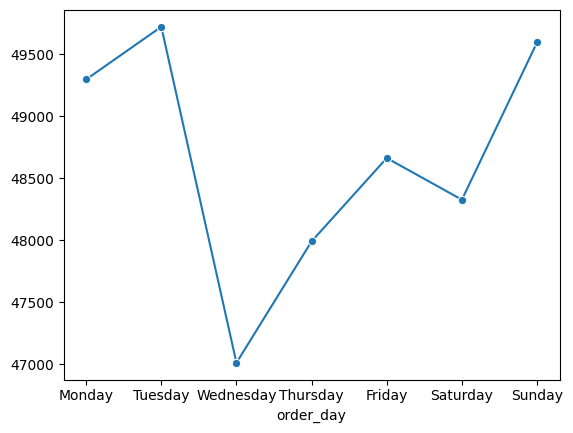

In [108]:
sns.lineplot(marker='o', x=top_revenue_by_day.index, y=top_revenue_by_day.values)

## 2. order_month vs order_total

In [109]:
top_revenue_by_month = (df.groupby('order_month')['order_total'].sum())
print(top_revenue_by_month)

order_month
1     27969.5
2     25431.0
3     30681.5
4     29202.0
5     29626.0
6     28809.5
7     28831.0
8     29646.0
9     26839.0
10    29254.5
11    27224.5
12    27103.0
Name: order_total, dtype: float64


<Axes: xlabel='order_month'>

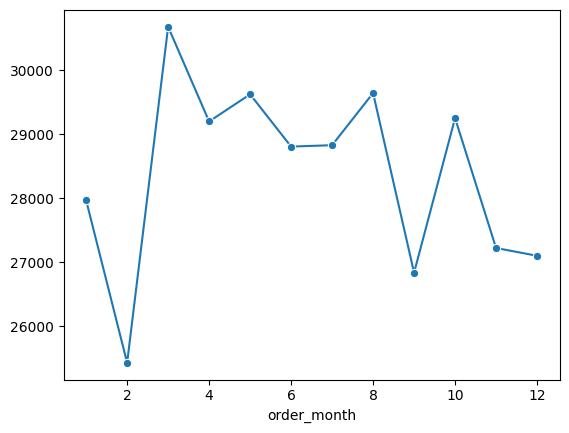

In [112]:
sns.lineplot(marker='o', x=top_revenue_by_month.index, y=top_revenue_by_month.values)

# Key Insights from EDA

Overall order volume and revenue remain relatively stable across most dimensions, indicating consistent restaurant performance without extreme volatility.

The average order value is approximately $20, with median close to mean, suggesting stable customer spending behavior.

Orders with lower quantities often result in higher order values, indicating the presence of premium items or limited discounting on smaller orders.

Main Dishes dominate order volume, while Drinks contribute significantly less, suggesting potential cross-selling opportunities.

A small number of items (e.g., Grilled Chicken) contribute disproportionately to revenue, highlighting the importance of high-performing menu items.

Revenue peaks on Tuesdays and drops on Wednesdays, indicating a mid-week demand imbalance.

March records the highest revenue while February shows lower performance, suggesting seasonal demand variation.

# Recommendations

Maintain premium pricing strategies for low-quantity, high-value items, as customers appear willing to pay more for select offerings.

Introduce targeted mid-week promotions (especially on Wednesdays) to improve revenue consistency across the week.

Bundle Drinks with Main Dishes to increase attach rate and overall order value.

Analyze top-performing items further to replicate their pricing or positioning across other menu categories.

Plan seasonal marketing campaigns during historically weaker months to stabilize monthly revenue.